In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x_max = 200
y_max = 100
s = [2.5, 10, 10, 10]
N = [50, 30, 20, 10]

A = [0,0]
B = [0,y_max]
C = [x_max, 0]

In [3]:
theta_b = np.arctan(x_max/y_max)
alpha = (np.pi/2-theta_b)/2  # 1/2 theta_c

In [4]:
def get_new_triangle(A, B, C, s):
    delta_b = s/np.tan(theta_b)+s/np.sin(theta_b)
    delta_c = s/np.tan(alpha)
    A1 = [(A[0]+s), (A[1]+s)]
    B1 = [(B[0]+s), (B[1]-delta_b)]
    C1 = [(C[0]-delta_c), (C[1]+s)]
    
    return A1, B1, C1

In [5]:
def get_side_line(B, C):
    # Calculate the coefficients
    x = [B[0], C[0]]
    y = [B[1], C[1]]
    coefficients = np.polyfit(x, y, 1)
    
    a = coefficients[0] # Zero Order, Constant Term
    b = coefficients[1] # First Order, Gradient
    co = [a, b]
    return co

In [6]:
def get_points(A, B, C, N):
    
    store=[]
    ab = B[1] - A[1]
    ac = C[0] - A[0]
    bc = ac / np.sin(theta_b)
    l_total = ab + ac + bc
    
    Nb = int(N * ac / l_total)
    Nc = int(N * ab / l_total)
    Na = N - Nb - Nc
    
    # On line AB, # of points = Nc
    delta_ab = (B[1] - A[1]) / (Nc + 1)
    d1 = 0
    for i in range(Nc):
        d1 = d1 + delta_ab
        store.append([A[0], (A[1] + d1)])

    # On line AC, # of points = Nb
    delta_ac = (C[0] - A[0]) / (Nb + 1)
    d2 = 0
    for i in range(Nb):
        d2 = d2 + delta_ac
        store.append([(A[0] + d2), A[1]])

    # On line BC, # of points = Na
    co = get_side_line(B, C)
    delta_x = (C[0] - B[0]) / (Na + 1)   # Increment along x direction
    d3 = B[0]
    for i in range(Na):
        d3 = d3 + delta_x
        store.append([d3, (co[0]*d3 + co[1])])
    
    # Coordinates
    store.extend([A, B, C])
    
    return store

In [7]:
pts=[]
for i in range(len(s)):
    A1, B1, C1 = get_new_triangle(A, B, C, s[i])   # return new_coor
    pts.extend(get_points(A1, B1, C1, N[i]))
    A, B, C = A1, B1, C1

<function matplotlib.pyplot.show(close=None, block=None)>

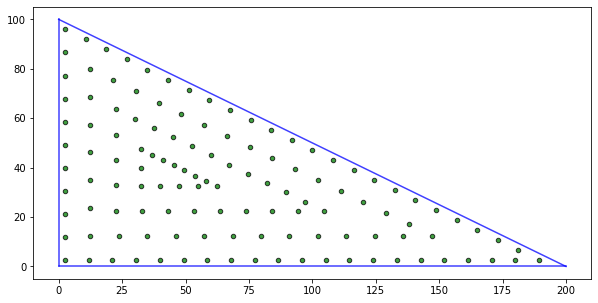

In [8]:
# Visualize
pts = np.array(pts)
x1 = pts[:,0]
y1 = pts[:,1]
#plt.figure(figsize = (150, 60))
plt.figure(figsize=(10,5))
plt.plot((0, 0), (0, y_max), scaley = False,c='blue',alpha = 0.75)
plt.plot((x_max, 0),(0, 0),scaley = False,c='blue',alpha = 0.75)
plt.plot((0, x_max), (y_max, 0), scaley = False,c='blue',alpha = 0.75)

# plt.plot((step,(x_max-delta_x)),((y_max-delta_y),step),'m--',label = '2.5 um separation',alpha = 0.75)
# plt.plot((step,step),(step,(y_max-delta_y)),'m--',alpha = 0.75)
# plt.plot((step,(x_max-delta_x)),(step,step),'m--',alpha = 0.75)

plt.scatter(x1,y1,s=20,c='green',edgecolor = 'black',alpha = 0.75)
plt.show